# Preliminary Data exploration

Dataset met alle metadata en preprocessing steps binnenhalen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../Materials/KVO_META.csv", encoding='utf8', index_col=False)
df['Genre'] = df['Genre'].str.lower()


In [2]:
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

## Frequenties

In [3]:
df['Original language'].value_counts(dropna=False)

DUI    2055
NL      921
FR      584
?       225
ITA     220
NaN     149
RUS     134
TSJ     101
DEE      66
ENG      12
NOR       3
Name: Original language, dtype: int64

### Aantal observaties per seizoen

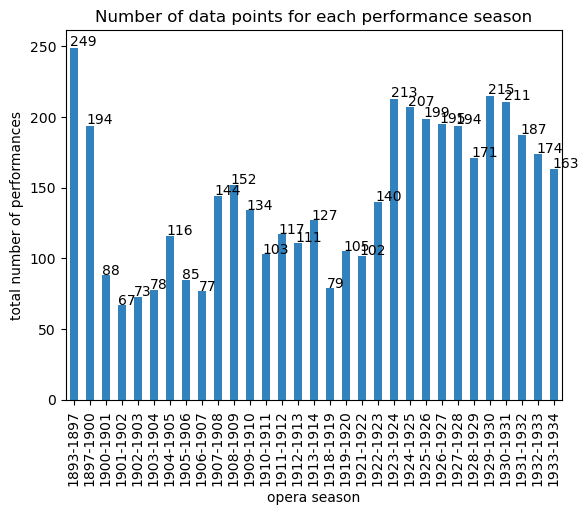

In [4]:
# Count the number of data points for each index
counts = df['Collection'].value_counts().sort_index(axis=0).plot(kind='bar', colormap='tab20c')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of performances')
plt.title('Number of data points for each performance season')

# Plot the counts as a bar chart

for p in counts.patches:
    counts.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

# Show the plot
plt.show()

### TOP 10 producties

<AxesSubplot:>

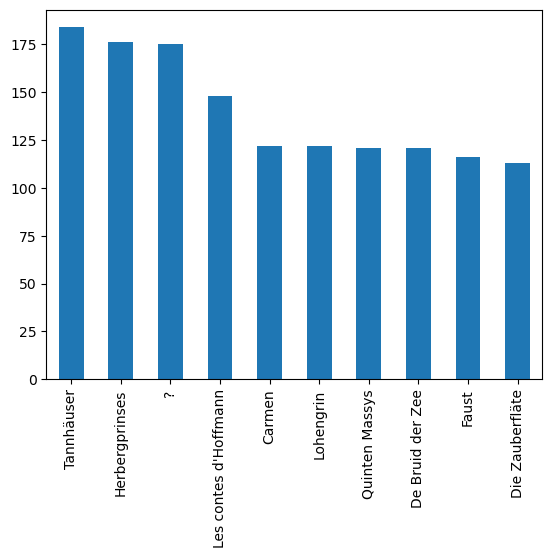

In [5]:
df['Original title'].value_counts().head(10).plot(kind='bar')
#top 10 meest gespeelde producties


### TOP 10 componisten

In [6]:
df['Composer'].value_counts(normalize=True).head(10)

Richard Wagner             0.156635
Jan Blockx                 0.073171
Jacques Offenbach          0.042291
Wolfgang Amadeus Mozart    0.040277
Franz Lehar                0.027970
Georges Bizet              0.027299
Emile Wambach              0.027075
Charles Gounod             0.026180
Albert D'Eugen             0.023719
Albert Lortzing            0.021929
Name: Composer, dtype: float64

c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


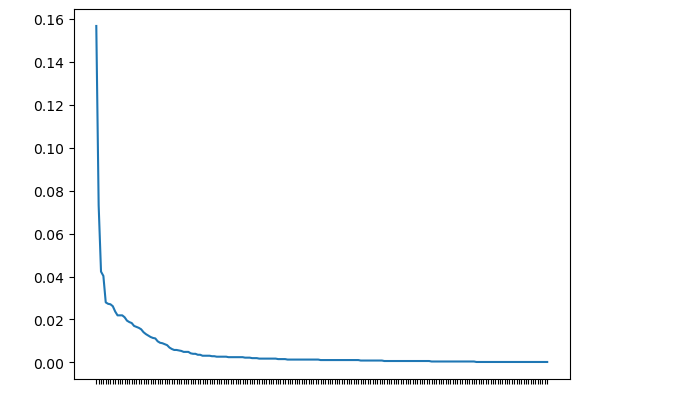

In [7]:
comp_dis = df['Composer'].value_counts(normalize=True)
plt.plot(comp_dis)
plt.xticks(color='white')
plt.show()

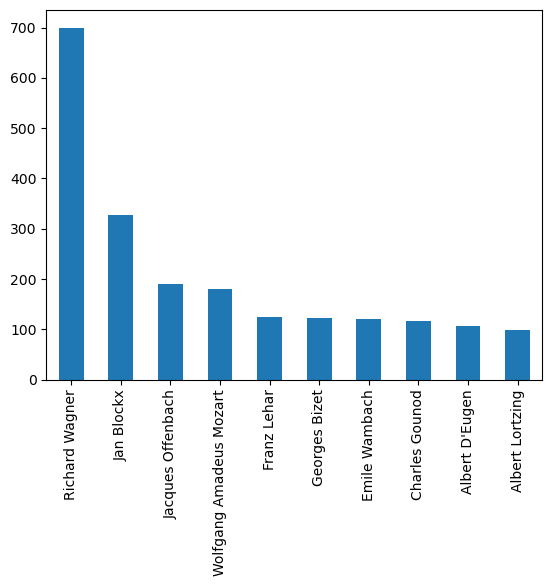

In [8]:
df['Composer'].value_counts().head(10).plot.bar();
#Meer dan 17% van alle voorstellingen waren werken van Wagner

### Evolutie van oorspronkelijke taal van producties.

#### Absolute frequentie

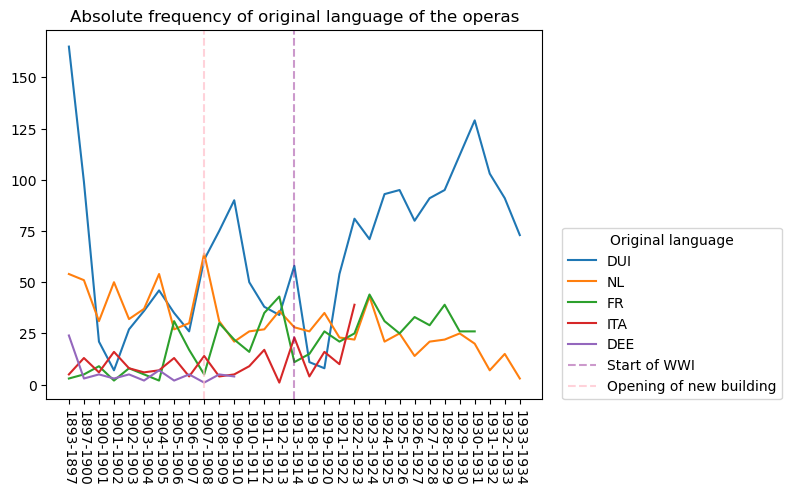

In [9]:
DUI = df[df['Original language']=='DUI']
NL = df[df['Original language']=='NL']
FR = df[df['Original language']=='FR']
ITA = df[df['Original language']=='ITA']
DEE = df[df['Original language']=='DEE']

Iksas = list(df['Collection'].unique())
#import matplotlib.pyplot as plt

#plot each series
plt.plot(Iksas, list(DUI.groupby('Collection')['Original language'].value_counts()), label = 'DUI')
plt.plot(list(NL.groupby('Collection')['Original language'].value_counts()),label = 'NL')
plt.plot(list(FR.groupby('Collection')['Original language'].value_counts()),label = 'FR')
plt.plot(list(ITA.groupby('Collection')['Original language'].value_counts()), label = 'ITA')
plt.plot(list(DEE.groupby('Collection')['Original language'].value_counts()),label = 'DEE')
plt.plot()

plt.title('Absolute frequency of original language of the operas')
plt.xticks(rotation=-90)
#display plot
#plt.axvline(x='1932-1933', color = 'black', alpha = 0.4, linestyle = '--', label = 'Théatre royal sluit de deuren')
plt.axvline(x='1913-1914', color = 'purple', alpha = 0.4, linestyle = '--', label = 'Start of WWI')
plt.axvline(x='1907-1908', color = 'pink', alpha = 0.7, linestyle = '--', label = 'Opening of new building')

legend = plt.legend(loc = (1.04,0), title='Original language')

plt.show()




#### Relatieve frequentie

In [10]:
def obtain_rel_freq(taal): #de taal neemt dus de vorm aan van één van die dfs eh dus DUI of NL of ITA ofzo
    rel_freq = []
    total = list(df['Collection'].value_counts().sort_index(axis=0))
    tal = list(taal.groupby('Collection')['Original language'].value_counts())
    tal = zip(total, tal)
    for item in tal:
        rel_freq.append(item[1]/item[0])
    return rel_freq

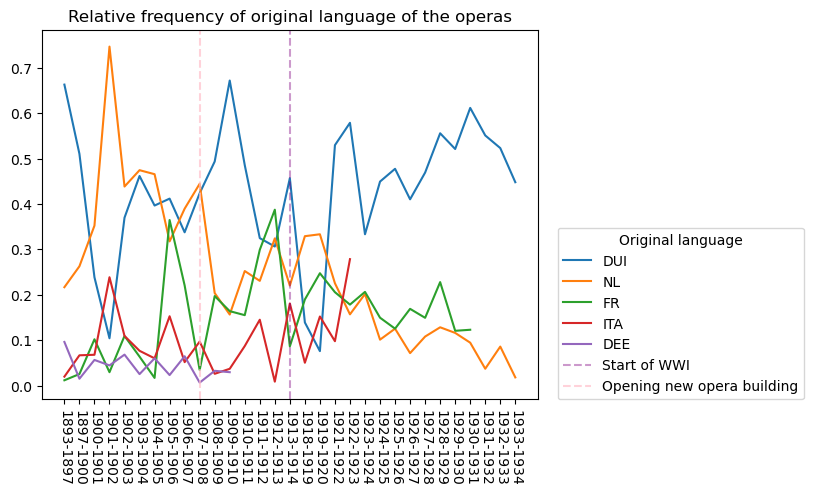

In [11]:
rel_ned = obtain_rel_freq(NL)
rel_dui = obtain_rel_freq(DUI)
rel_fr = obtain_rel_freq(FR)
rel_ita = obtain_rel_freq(ITA)
rel_dee = obtain_rel_freq(DEE)

Iksas = list(df['Collection'].unique())

#plot each series
plt.plot(Iksas, rel_dui, label = 'DUI')
plt.plot(rel_ned,label = 'NL')
plt.plot(rel_fr,label = 'FR')
plt.plot(rel_ita, label = 'ITA')
plt.plot(rel_dee,label = 'DEE')
plt.plot()


plt.title('Relative frequency of original language of the operas')
plt.xticks(rotation=-90)
#plt.axvline(x='1932-1933', color = 'black', alpha = 0.4, linestyle = '--', label = 'Théatre royal closes')
plt.axvline(x='1913-1914', color = 'purple', alpha = 0.4, linestyle = '--', label = 'Start of WWI')
plt.axvline(x='1907-1908', color = 'pink', alpha = 0.7, linestyle = '--', label = 'Opening new opera building')

plt.legend(loc = (1.04,0), title='Original language')
#display plot
plt.show()

#Stream graph

## Gegoten in een stream plot

In excel nog niet gelukt, maar in Python is dat zo gepiept.<br>
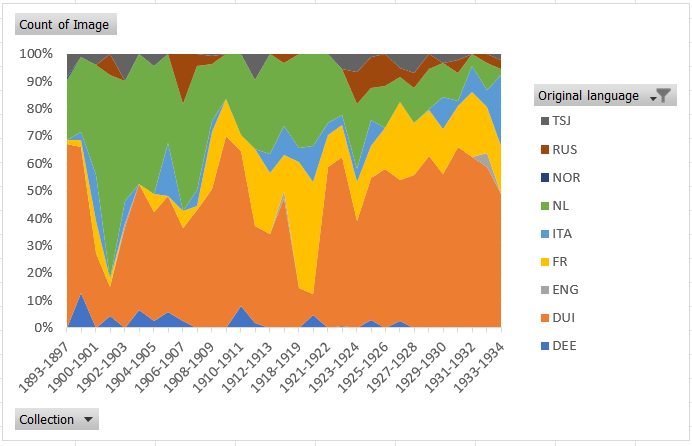

## Gala / Volksvertoningen

In [12]:
#Gefilterede df's waarin enkel de volksvertoningen en galavoorstellingen in beschouwing worden genomen
volk = df[df['Occasion'].astype(str).str.contains("Volk")]
galas = df[df['Occasion'].str.contains('Gala') | (df['Occasion'] == 'Gala')]

In [13]:
vcounts = volk['Collection'].value_counts(sort=False)
gcounts = galas['Collection'].value_counts(sort=False)

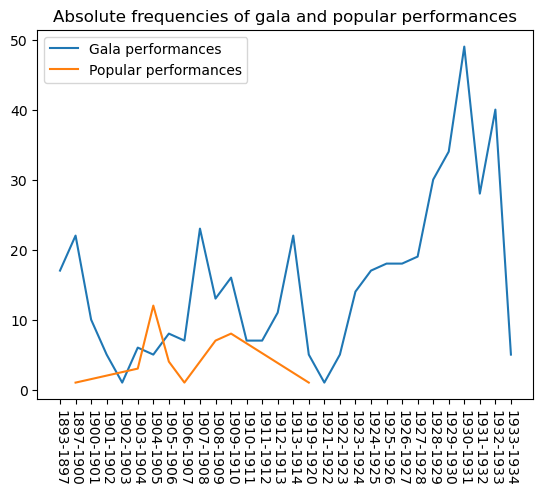

In [14]:
plt.plot(gcounts.index, gcounts.values, label='Gala performances')
plt.plot(vcounts.index, vcounts.values, label='Popular performances')

plt.title("Absolute frequencies of gala and popular performances")
plt.legend()
plt.xticks(rotation=-90)
plt.show()

### Absolute frequenties

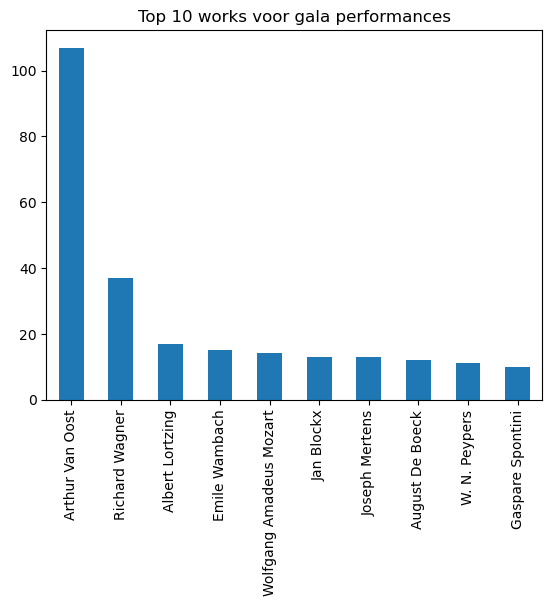

In [15]:
galas['Composer'].value_counts().head(10).plot(kind='bar', title="Top 10 works voor gala performances");  
volk['Composer'].value_counts().head(10).plot(kind='bar', title="Top 10 works voor gala performances");  

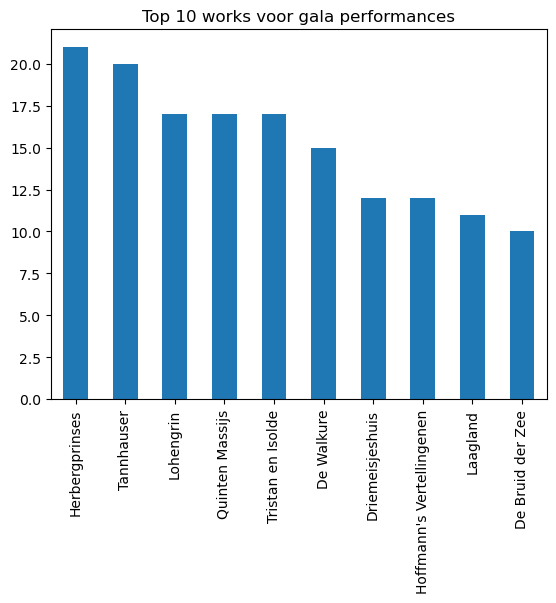

In [16]:
galas['Normalised title'].value_counts().head(10).plot(kind='bar', title="Top 10 works voor gala performances");  

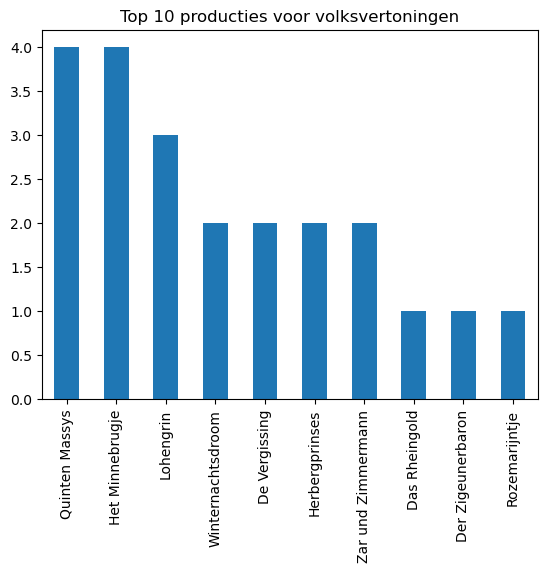

In [17]:
volk['Original title'].value_counts().head(10).plot(kind='bar', title= "Top 10 producties voor volksvertoningen");

<AxesSubplot:title={'center':"Meest voorkomende talen van gala's"}>

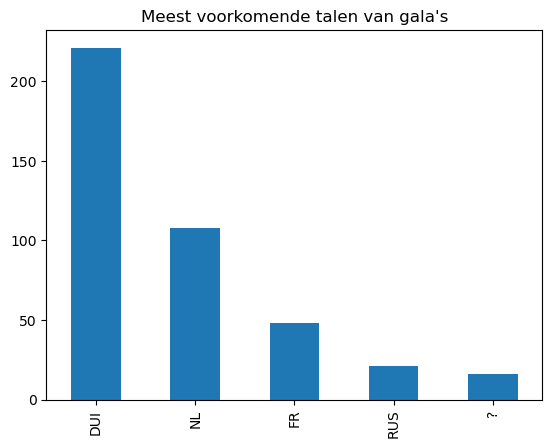

In [18]:
galas['Original language'].value_counts().head().plot(kind='bar', title = "Meest voorkomende talen van gala's")

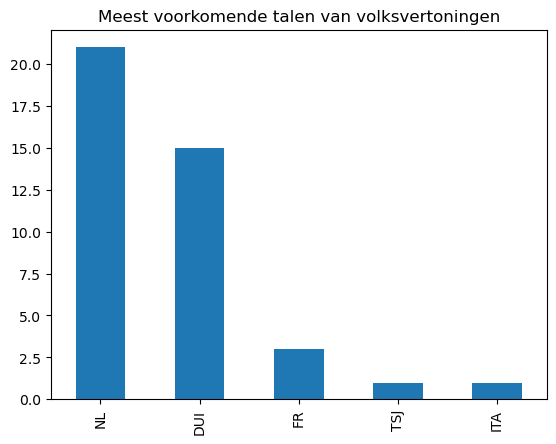

In [19]:
volk['Original language'].value_counts().plot(kind = 'bar', title = "Meest voorkomende talen van volksvertoningen");

## Relatieve frequenties

In [20]:
def plot_rel_freq(df, title):
    x = []
    y =  []
    for k, v in df['composer'].value_counts().items():
        x.append(k)
        y.append(v/len(df))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(title)
    ax.bar(x, y, color = 'orange');


In [21]:
len(volk['Composer'].value_counts(normalize=True))

23

<AxesSubplot:title={'center':'Relative frequency of top 10 composers of popular displays'}>

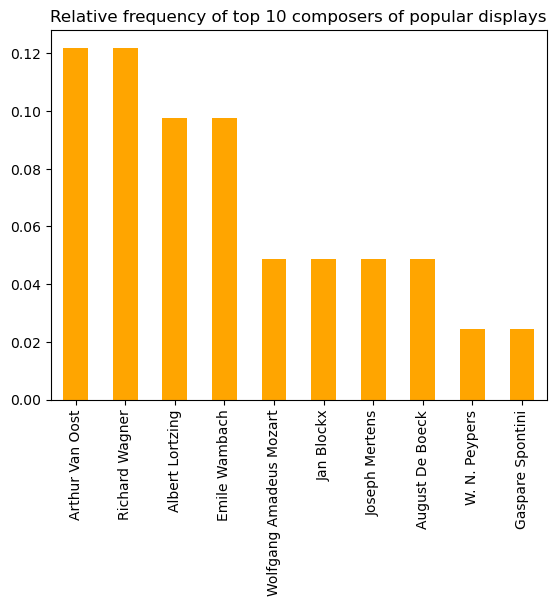

In [41]:
testV = volk['Composer'].value_counts(normalize=True).head(10)

testV.plot(kind='bar', title='Relative frequency of top 10 composers of popular displays', color = 'orange')

<AxesSubplot:title={'center':'Relative frequency of top 10 composers of gala displays'}>

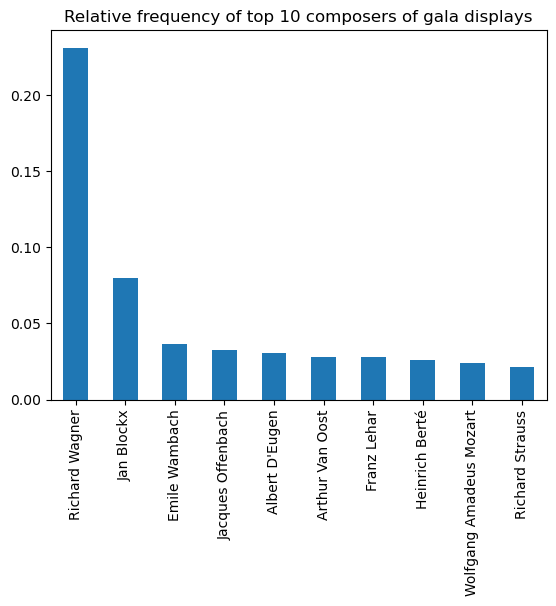

In [38]:
testG = galas['Composer'].value_counts(normalize=True).head(10)
testG.plot(kind='bar', title= 'Relative frequency of top 10 composers of gala displays')


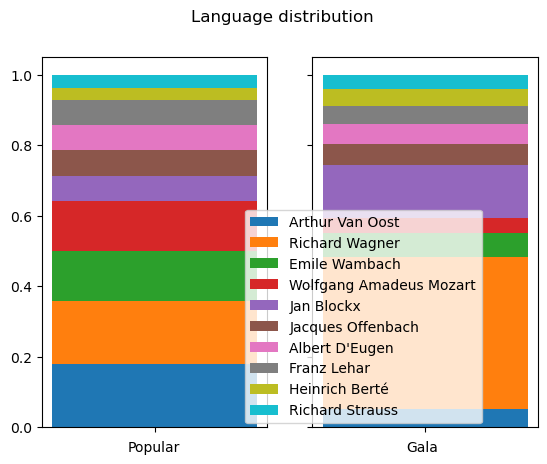

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the first stacked bar chart
data_1 = dict(volk['Composer'].value_counts().head(10))
# Define the data for the second stacked bar chart
data_2 = dict(galas['Composer'].value_counts().head(10))

# Define a list of colors for the bars
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6', '#b3e6ff', '#e6ccb3', '#c2f0c2']

# Create a list of keys in the order they appear in the data dictionaries
keys = []
for key in data_1.keys():
    if key not in keys:
        keys.append(key)
for key in data_2.keys():
    if key not in keys:
        keys.append(key)

# Create the figure and axis objects
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# Stack the data for the first chart
stacked_data_1 = np.row_stack([data_1.get(key, 0) for key in keys])
stacked_data_1 = stacked_data_1 / stacked_data_1.sum(axis=0)

# Define the x-axis labels for the first chart
x_labels_1 = ['']

# Create the stacked bar chart for the first chart
for i, key in enumerate(keys):
    if key in data_1.keys():
        #color = colors[i]
        ax1.bar(x_labels_1, stacked_data_1[i], bottom=stacked_data_1[:i].sum(axis=0))

# Add a legend for the first chart
#ax1.legend([key for key in keys if key in data_1.keys()])

# Define the x-axis labels for the second chart
x_labels_2 = ['']

# Stack the data for the second chart
stacked_data_2 = np.row_stack([data_2.get(key, 0) for key in keys])
stacked_data_2 = stacked_data_2 / stacked_data_2.sum(axis=0)

# Create the stacked bar chart for the second chart
for i, key in enumerate(keys):
    if key in data_2.keys():
        #color = colors[i]
        ax2.bar(x_labels_2, stacked_data_2[i], bottom=stacked_data_2[:i].sum(axis=0))

# Add a legend for the second chart
ax2.legend([key for key in keys if key in data_2.keys()], loc = (-0.3, 0.01))

# Add axis labels and title
fig.text(0.3, 0.06, 'Popular', ha='center')
fig.text(0.72, 0.06, 'Gala', ha='center')
#fig.text(0.08, 0.5, 'Percentages', va='center', rotation='vertical')
fig.suptitle('Language distribution')

# Display the chart
plt.show()


In [ ]:
def plot_rel_freq(df, title):
    x = []
    y =  []
    for k, v in df['Genre'].value_counts().head().items():
        x.append(k)
        y.append(v/len(df))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(title)
    ax.bar(x, y);


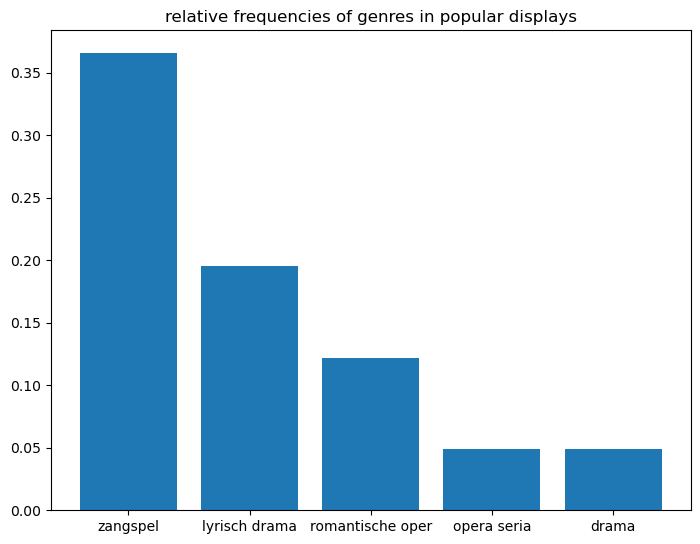

In [ ]:
plot_rel_freq(volk, 'relative frequencies of genres in popular displays')

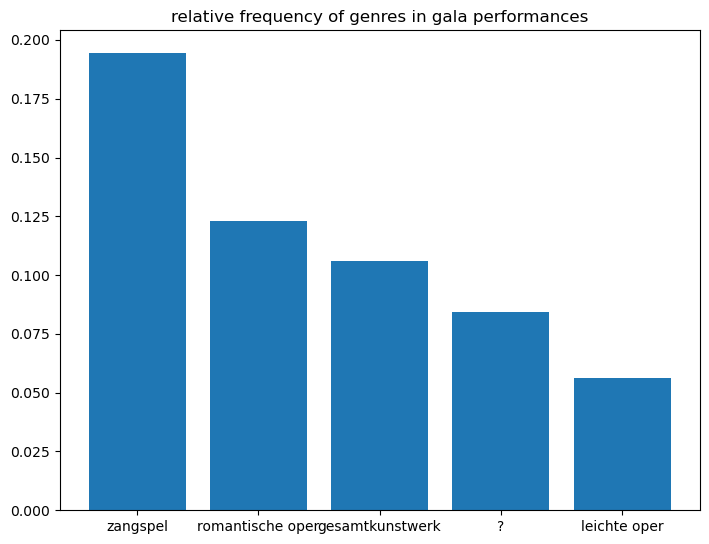

In [ ]:
plot_rel_freq(galas, 'relative frequency of genres in gala performances')

### Gemiddelde tijd tussen wereldpremière van een stuk en eerste opvoering in Antwerpen.

In [ ]:
eerste_voorkomen = []
for item in df.groupby('Original title')['Date'].min():
    eerste_voorkomen.append(item)


premiere = []
for item in df.groupby('Original title')['World-premiere'].min():
    premiere.append(item)


premiere = pd.to_datetime(pd.Series(premiere), dayfirst=True, errors='coerce');
eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), dayfirst=True, errors='coerce');

print(len(eerste_voorkomen) == len(premiere))


True


In [ ]:
result = []
x = dict(zip(premiere, eerste_voorkomen))
for key, value in x.items():
    try:
        result.append(int(value.year) - int(key.year))
    except ValueError:
        continue
    

In [ ]:
max(result)

168

In [ ]:
# Het duurt gemiddeld 45 jaar
def Average(lst):
    return sum(lst) / len(lst)

round(Average(result), 2)

44.91

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')



In [ ]:
import pandas as pd

# assume your dataframe is named 'df'
df['Year_diff'] = df['Date'].dt.year - pd.to_numeric(df['World-premiere'], errors='coerce')
df['Year_diff'] = df['Year_diff'].apply(lambda x: '?' if pd.isna(x) else x)

for row in df.iterrows():
    if row['Year_diff'] > 300:
        print( )


0       72.0
1       22.0
2       72.0
3       22.0
4          ?
        ... 
4465    52.0
4466    30.0
4467    18.0
4468     2.0
4469     9.0
Name: Year_diff, Length: 4470, dtype: object

# Taaldistributie van de programmatie per directie

In [ ]:
table = pd.pivot_table(df, values='Image', index='Directors',
                    columns='Original language', aggfunc='count')

In excel is dat gemakkelijker

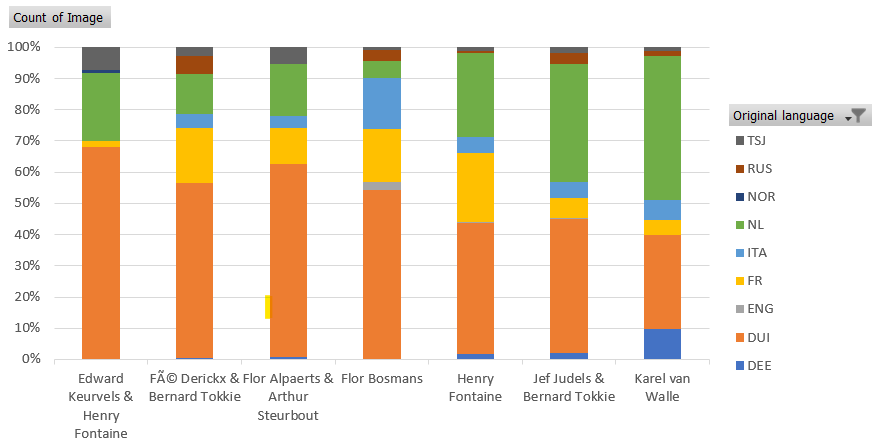

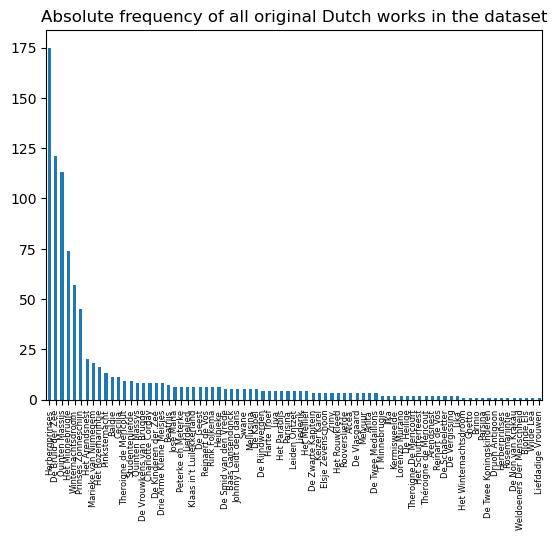

In [49]:
NL['Normalised title'].value_counts().plot(kind='bar', title='Absolute frequency of all original Dutch works in the dataset')
plt.xticks(fontsize=6)
plt.show()